In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import re

2.Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [20]:
files=glob('states*')
us_census=pd.concat((pd.read_csv(file)for file in files), ignore_index=True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


3.Look at the .columns and the .dtypes of the us_census DataFrame.

In [21]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [22]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

4.Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

In [23]:
us_census.head(3)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F



5.Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [24]:
us_census["Income"]=us_census["Income"].replace("\$","",regex=True)
us_census["Income"]=us_census["Income"].astype("float")
print("Datatype of Income column after conversion is: " , us_census["Income"].dtypes)

Datatype of Income column after conversion is:  float64


6.Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column. Split the column into those two new columns using str.split and separating out those results.

In [25]:
us_census["GenderPop"].head()

0      2341093M_2489527F
1        384160M_349215F
2      3299088M_3342840F
3      1451913M_1506295F
4    19087135M_19334329F
Name: GenderPop, dtype: object

In [26]:
GenderPop_split = us_census["GenderPop"].str.split("_", expand=True)
us_census["Male"]= GenderPop_split[0].str.extract("(\d+)", expand=True)
us_census["Female"]= GenderPop_split[1].str.extract("(\d+)", expand=True)

7.Convert both of the columns into numerical datatypes.

In [27]:
us_census["Male"]=pd.to_numeric(us_census["Male"])
us_census["Female"]=pd.to_numeric(us_census["Female"])

In [28]:
#Removing extra columns from our Dataframe
us_census=us_census.drop(["GenderPop","Unnamed: 0"], axis=1)

8.Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show! Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) Remember to call plt.show() to see the graph!

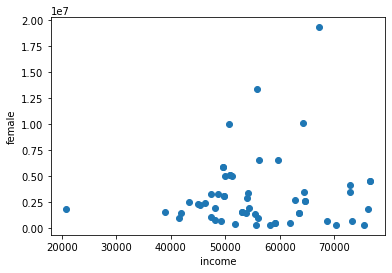

In [29]:
x=us_census["Income"]
y=us_census["Female"]
plt.scatter(x,y)
plt.xlabel("income")
plt.ylabel("female")
plt.show()

9. Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state. Print out the Women column after filling the nan values to see if it worked!

In [30]:
Female_null_values=us_census["Female"][us_census["Female"].isnull()]
Female_null_values

23   NaN
24   NaN
31   NaN
Name: Female, dtype: float64

In [31]:
females=us_census["TotalPop"]-us_census["Male"]
us_census["Female"]=us_census["Female"].fillna(value=females)
us_census['Female']

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

10.We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [32]:
Duplicates=us_census[us_census.duplicated()]

11.Drop those duplicates using the .drop_duplicates() function.

In [33]:
us_census.drop_duplicates(keep="first", inplace=True)

12.Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

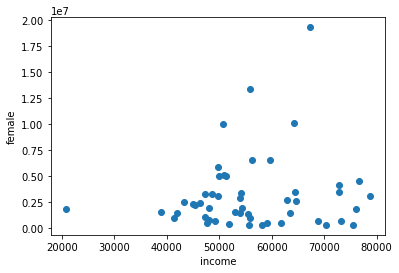

In [34]:
x=us_census["Income"]
y=us_census["Female"]
plt.scatter(x,y)
plt.xlabel("income")
plt.ylabel("female")
plt.show()

13.Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [35]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Male', 'Female'],
      dtype='object')

14. Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [36]:
us_census = us_census.replace('%*','',regex=True)
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]] =us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].apply(pd.to_numeric)
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].fillna(0)

,Hispanic,White,Black,Native,Asian,Pacific
0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354
1,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683
2,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632
3,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861
4,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410
5,20.784380,69.895572,3.546377,0.573833,2.661997,0.000000
7,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599
8,8.824766,64.632710,20.743925,0.259813,3.268692,0.000000
9,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609
10,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510


In [37]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27    False
28    False
29    False
31    False
32    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
43    False
44    False
45    False
46    False
47    False
49    False
50    False
51    False
52    False
53    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

Making histograms for each race.

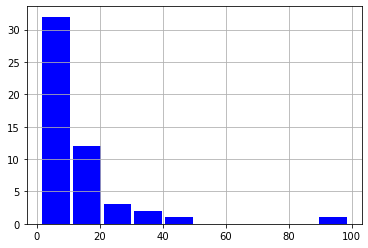

In [38]:
us_census['Hispanic'].hist(rwidth=0.90,color='blue')

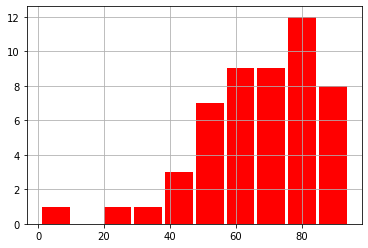

In [39]:
us_census['White'].hist(rwidth=0.90,color='red')

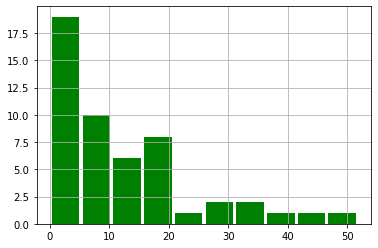

In [40]:
us_census['Black'].hist(rwidth=0.90,color='green')

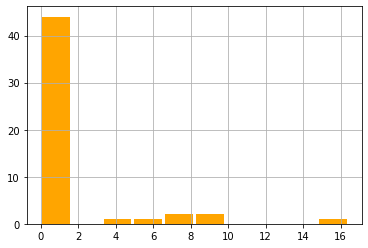

In [41]:
us_census['Native'].hist(rwidth=0.90,color='orange')

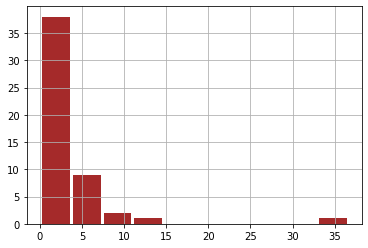

In [42]:
us_census['Asian'].hist(rwidth=0.90,color='brown')

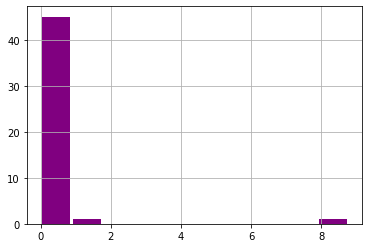

In [43]:
us_census['Pacific'].hist(rwidth=0.90,color='purple')